## Observations and Insights 

In [1]:
#Observations 
#There does not appear to be a correlation tumor volume and weight.
#The Capomulin drug regimen reduces tumor volume significantly.
#Besides Capomulin and Ramicane, many of the drug regimens did not 
#reduce the average tumor volume dramatically,even when compared to the placebo.

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pyma_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
pyma_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
pyma_df["Mouse ID"].count()


1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#pyma_df[pyma_df.duplicated(['Mouse ID'], keep=False)]
pyma_duplicates = pyma_df[pyma_df.duplicated(subset=['Mouse ID','Timepoint'], keep = 'first')]
pyma_duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRowsDF = pyma_df[pyma_df.duplicated(subset=['Mouse ID'], keep=False)]
duplicateRowsDF
#print((~pyma_df.duplicated()).sum())

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#pyma_df.drop_duplicates(subset ="Mouse ID",
                     #keep = False, inplace = False)
cleanpyma_df = pyma_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first')
print('Result DataFrame:\n',cleanpyma_df)

Result DataFrame:
      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898              

In [6]:
# Checking the number of mice in the clean DataFrame.
cleanpyma_df["Mouse ID"].count()

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
#Nameitemid=duplicateRowsDF.groupby(["Drug Regimen"]).unique()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

m_avg = cleanpyma_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
m_med=cleanpyma_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
#m_mode=cleanpyma_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(pd.Series.mode)
m_var=cleanpyma_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
m_std=cleanpyma_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
m_sem=cleanpyma_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
drugsumm_df = pd.DataFrame({'Average': m_avg,'Median':m_med,'Variance':m_var,'STD':m_std,'SEM':m_sem})
drugsumm_df

#drug_df = pd.DataFrame({'Average': m_avg,'Median':m_med, 'Variance':m_var,'Stad':m_std})
#drug_df
#m_mode=duplicateRowsDF.groupby(['Tumor Volume (mm3)']).agg(lambda x:x.mode().index[0])
#duplicateRowsDF.groupby('Drug Regimen').B.apply(lambda x:x.mode).reset_index()
#m_mode
#index =['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo','Propriva', 
#details 'Ramicane', 'Stelasyn', 'Zoniferol'])
#ser = pd.Series(pd.Categorical(['Capomulin','Ceftamin'])) ser.array
#m_mode=duplicateRowsDF.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mode()
#m_mode
#cleanpyma_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(pd.Series.mode)

,Average,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
x=cleanpyma_df.groupby("Drug Regimen").agg({"Age_months":["mean","max","min"]})
x

Age_months        
                   mean max min
Drug Regimen                   
Capomulin     13.456522  24   1
Ceftamin      13.247191  24   2
Infubinol     16.230337  24   1
Ketapril      15.659574  24   1
Naftisol      12.000000  23   2
Placebo       10.734807  21   1
Propriva      10.570513  24   1
Ramicane      10.684211  23   1
Stelasyn      12.784530  23   1
Zoniferol     12.598901  24   2

## Bar and Pie Charts

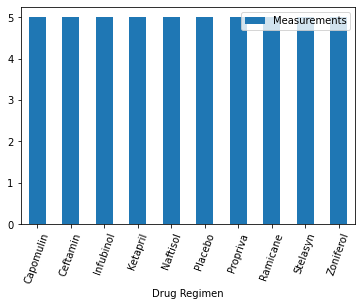

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

df = pd.DataFrame({'Drug Regimen':['Capomulin', 'Ceftamin', 'Infubinol','Ketapril','Naftisol',
                                   'Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'], 
                   'Measurements':[5,5,5,5,5,5,5,5,5,5]})
ax = df.plot.bar(x='Drug Regimen', y='Measurements', rot=70)

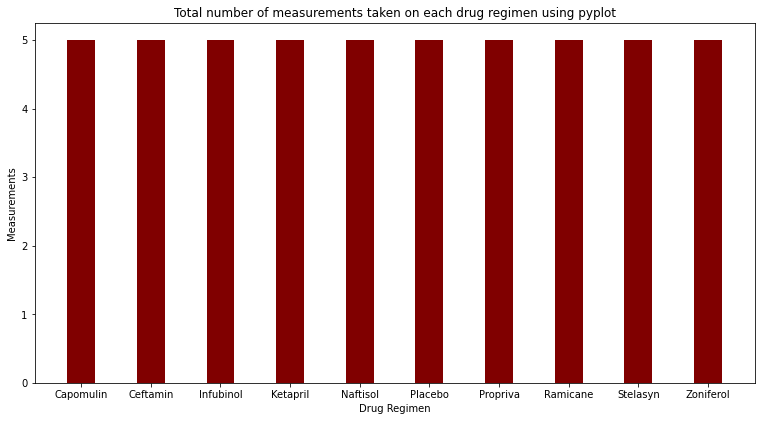

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# A python dictionary
fig = plt.figure(figsize = (10, 5))
ax = fig.add_axes([0,0,1,1])
drugreg = ['Capomulin', 'Ceftamin', 'Infubinol','Ketapril','Naftisol',
           'Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
measurements = [5,5,5,5,5,5,5,5,5,5]

# creating the bar plot
plt.bar(drugreg, measurements, color ='maroon',
        width = 0.4)
 
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")
plt.title("Total number of measurements taken on each drug regimen using pyplot")
plt.show()


<AxesSubplot:title={'center':'Distribution of Female versus Male mice'}, ylabel='Total'>

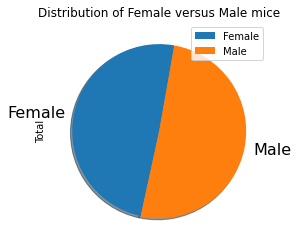

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sx_df = cleanpyma_df.drop_duplicates(subset=['Mouse ID'], keep='first')
male=sx_df["Sex"].value_counts()["Male"]
#male
female=sx_df["Sex"].value_counts()["Female"]
#sx_df.groupby(['Sex']).sum().plot(kind='pie', y='Sex')

my_dict={
'Sex':['Female','Male'],
'Total':[117,120]
}
my_labels=['Female','Male']

df = pd.DataFrame(data=my_dict)
df.plot.pie(title="Distribution of Female versus Male mice",y='Total',
            fontsize=16,startangle=80,shadow=True,labels=my_labels)

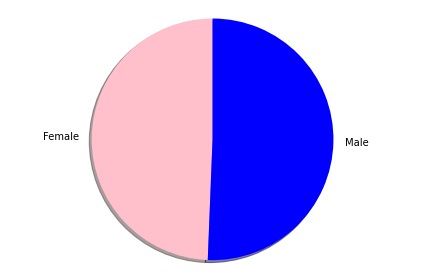

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplotData = {'Totals': [117,120]}
raw_data = {'Sex': ['Female', 'Male'],
        'totals': [117, 120,]}
gdf = pd.DataFrame(raw_data, columns = ['Sex', 'totals'])

colors = ["pink", "blue"]
# Create a pie chart
plt.pie(gdf['totals'],labels=gdf['Sex'],shadow=True,colors=colors,startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
largest_tumor = cleanpyma_df.groupby(["Mouse ID"])['Timepoint'].max()
largest_tumor = largest_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tt_mrg = largest_tumor.merge(cleanpyma_df,on=['Mouse ID','Timepoint'],how="left")

# Start by getting the last (greatest) timepoint for each mouse
#qob_df = duplicateRowsDF[duplicateRowsDF.duplicated(subset=['Timepoint'], keep = 'last')]
#qob_df

#duplicateRowsDF.groupby("Timepoint").apply(lambda duplicateRowsDF:duplicateRowsDF.irow(duplicateRowsDF.value.argmax()))

#q=duplicateRowsDF[['Timepoint']][duplicateRowsDF.Timepoint == duplicateRowsDF['Timepoint'].max()]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#df_new = pd.merge(duplicateRowsDF, q,  left_on='Timepoint', right_on='Timepoint')
#df_new


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
    last_tumor= tt_mrg.loc[tt_mrg["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    # add subset 
    tumor_vol.append(last_tumor)
    # Determine outliers using upper and lower bounds

    quartiles = cleanpyma_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_vol = last_tumor.loc[(last_tumor < lower_bound) | 
                                 (last_tumor  > upper_bound)]
    outlier_vol

    print(f"{drug}'s potential outliers: {outlier_vol}")   

Capomulin's potential outliers: 175    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 97    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


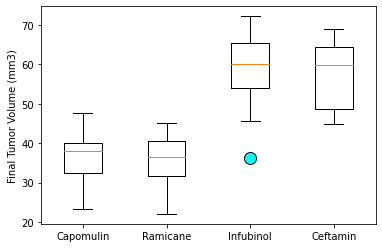

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#fig1, ax1 = plt.subplots()
#ax1.set_title('Mouse ID')
#ax1.set_ylabel('Tumor Volume (mm3)')
#ax1.boxplot(newpyma_df["Tumor Volume (mm3)"])
#plt.show()

red_out = dict(markerfacecolor='cyan',markersize=12)
plt.boxplot(tumor_vol, labels = treatment_list,flierprops=red_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

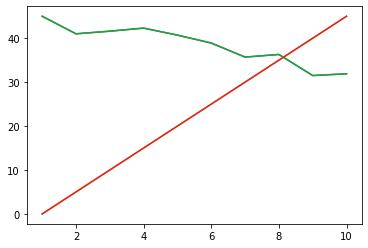

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
newdf=duplicateRowsDF.loc[duplicateRowsDF["Drug Regimen"]=="Capomulin"]

mwc=newdf.groupby(['Mouse ID','Tumor Volume (mm3)','Timepoint']).size()
#mwc.tail()
#---------------------Tumor Volume Line Plot

# Mouse ID: y793 Tumor Volume: 40.72   Timepoint: 20

x_axis_data = np.arange(1,11,1)
x_axis_data

tv_points = [45, 41, 41.6, 42.3, 40.7, 38.9,35.7, 36.3,31.5,31.9]
# Plot the line
plt.plot(x_axis_data, tv_points)
#plt.show()
#---------------------Timepoint Line Plot

x_axis_data = np.arange(1,11,1)
x_axis_data

tp_points = [0,5, 10, 15,20,25,30,35, 40,45]
# Plot the line
plt.plot(x_axis_data, tp_points)
#plt.show()

#---------------------Tumor Volume versus Timepoint Line Plot
plt.plot(x_axis_data, tv_points)
plt.plot(x_axis_data, tp_points)
plt.show()

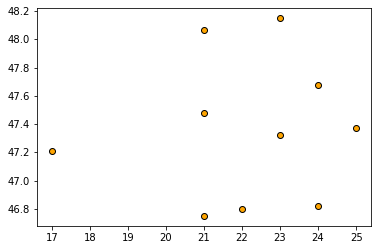

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
newdf=duplicateRowsDF.loc[duplicateRowsDF["Drug Regimen"]=="Capomulin"]

wwc=newdf.groupby(['Tumor Volume (mm3)','Weight (g)']).size()
wwc.tail(10)

mouse_w = [21, 22, 24, 17, 23, 25, 21, 24, 21, 23]
avgtumor_vol = [46.75, 46.8, 46.82, 47.21, 47.32, 47.37, 47.48, 47.68, 48.07, 48.15]

plt.scatter(mouse_w, avgtumor_vol, marker="o", facecolors="orange", edgecolors="black")

## Correlation and Regression

The correlation coefficient between weight and avg Tumor Volume is 0.53


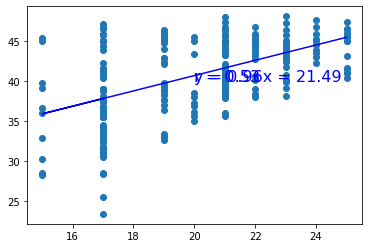

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight_val = newdf ['Weight (g)']
Tv_val = newdf ['Tumor Volume (mm3)']

corr = round (st.pearsonr(weight_val,Tv_val) [0],2)
(slope,intercept, rvalue,pvalue, stderr) = linregress(weight_val,Tv_val)
r_values = weight_val* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept,2))

plt.scatter(weight_val,Tv_val)
plt.plot(weight_val,r_values, "blue")
plt.annotate(line_eq,(20,40),fontsize=16,color="blue")
plt.annotate(f'r = {corr}',(20,40),fontsize=16,color="blue")
print(f"The correlation coefficient between weight and avg Tumor Volume is {round(st.pearsonr(weight_val,Tv_val)[0],2)}")